## 01. EDA & 전처리


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [68]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 01-1 데이터 기본정보 & 결측치 확인하기
1. info 함수를 통해 데이터 기본 정보확인 및 결측치를 대략적으로 확인하였다.<br>
2. isnull().sum() 함수를 통해 결측치를 확인해보았으나, 피쳐수가 많아 다 나타나지 않았다.<br>
3. train/test 각 각에 대해 한심해보일 수 있지만, 결측치를 나타내는 피쳐들을 적어보았다.<br>
> #train <br>
LotFrontage    1201 non-null(삭제)<br>
Alley          91 non-null  (삭제)<br>
MasVnrType     1452 non-null(삭제)<br>
MasVnrArea     1452 non-null(삭제)<br>
BsmtQual       1423 non-null(삭제)<br>
BsmtCond       1423 non-null(삭제)<br>
BsmtExposure   1422 non-null(삭제)<br>
BsmtFinType1   1423 non-null(삭제)<br>
BsmtFinType2   1422 non-null(삭제)<br>
Electrical     1459 non-null<br>
FireplaceQu    770 non-null (삭제)<br>
GarageType     1379 non-null(삭제) <br>
GarageYrBlt    1379 non-null(삭제)<br>
GarageFinish   1379 non-null(삭제) <br>
GarageQual     1379 non-null(삭제)<br>
GarageCond     1379 non-null(삭제)<br>
PoolQC         7 non-null   (삭제)<br>
Fence          281 non-null (삭제)<br>
MiscFeature    54 non-null  (삭제)<br>
>
> #test <br>
MSZoning       1455 non-null  <br>
LotFrontage    1232 non-null<br>
Alley          107 non-null<br>
Utilities      1457 non-null<br>
Exterior1st    1458 non-null<br>
Exterior2nd    1458 non-null<br>
MasVnrType     1443 non-null<br>
MasVnrArea     1444 non-null<br>
BsmtQual       1415 non-null<br>
BsmtCond       1414 non-null<br>
BsmtExposure   1415 non-null<br>
BsmtFinType1   1417 non-null<br>
BsmtFinSF1     1458 non-null<br>
BsmtFinType2   1417 non-null   <br>
BsmtFinSF2     1458 non-null   <br>
BsmtUnfSF      1458 non-null   <br>
TotalBsmtSF    1458 non-null   <br>
BsmtFullBath   1457 non-null <br>
BsmtHalfBath   1457 non-null <br>
KitchenQual    1458 non-null<br>
Functional     1457 non-null<br>
FireplaceQu    729 non-null<br>
GarageType     1383 non-null <br>
GarageYrBlt    1381 non-null  <br>
GarageFinish   1381 non-null  <br>
GarageCars     1458 non-null  <br>
GarageArea     1458 non-null  <br>
GarageQual     1381 non-null <br>
GarageCond     1381 non-null<br>
PoolQC         3 non-null     <br>
Fence          290 non-null   <br>
MiscFeature    51 non-null   <br>
SaleType       1458 non-null  <br>
>
4. train에서 상당수의 결측치를 보이는 피쳐들을 모두 제거하였습니다. .shape함수를 통해 행열 갯수를 관찰해보았습니다. 
> train(1460, 63) <br>
test(1459, 62)<br>
>
5. 여전히 피쳐 수가 많다. 이를 어떻게 처리할지에 대한 고민을 해야할 듯.

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [71]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [72]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [73]:
df_train = train.drop(['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCond','PoolQC','Fence','MiscFeature'], axis=1)
df_test = test.drop(['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCond','PoolQC','Fence','MiscFeature'], axis=1)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [76]:
df_train = df_train.drop(['GarageQual'],axis=1)
df_test = df_test.drop(['GarageQual'],axis=1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [79]:
print(df_train.shape)
print(df_test.shape)

(1460, 63)
(1459, 62)


### 01-2 변수간 상관관계 파악
1. 변수간 상관관계 파악을 해보았으나 전혀 모르겠다.....
2. 너무 많은 column들로 인해 분석 자체가 되질 않는다.
3. 원하는 column을 선별해서 뽑아내는게 나을듯.

<AxesSubplot:title={'center':'House Price'}>

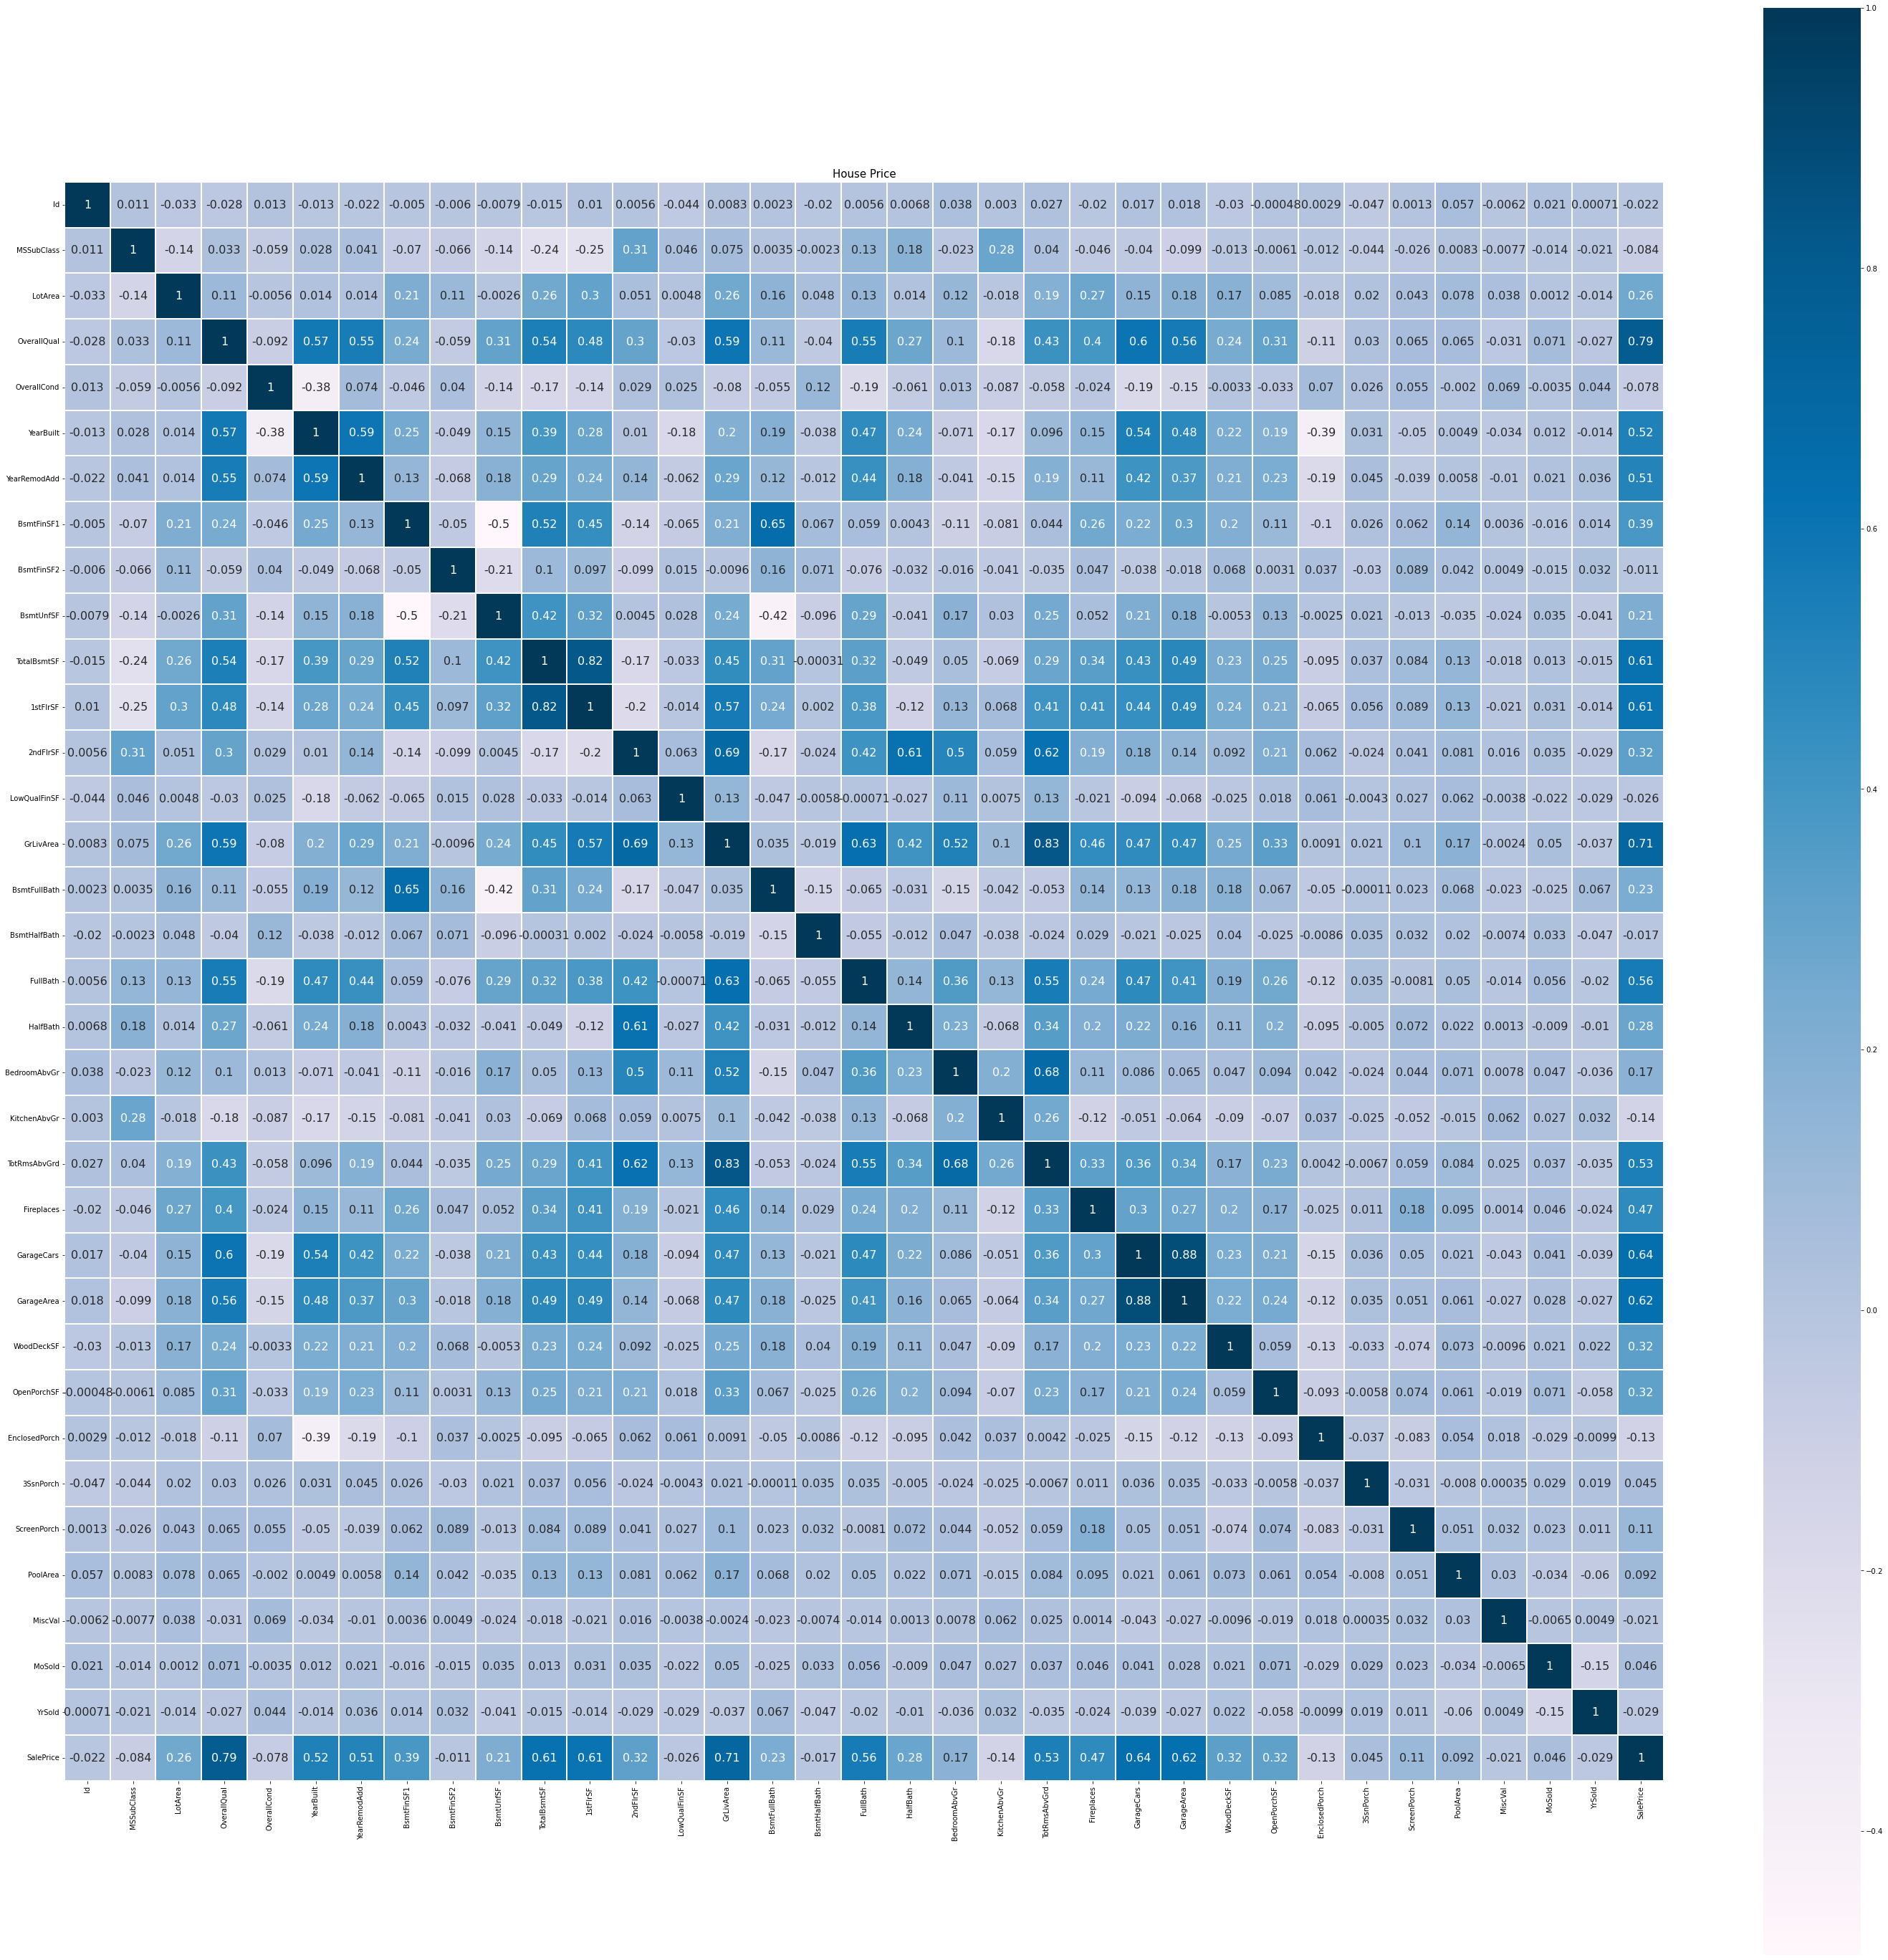

In [80]:
import seaborn as sns

colormap = plt.cm.PuBu
data = df_train.corr()
plt.figure(figsize=(50,50))
plt.title("House Price", y=1.0, size=15)
sns.heatmap(data,linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True, annot_kws={"size":16})

### 01-3 column 뽑아내기
>아래의 리스트로 뽑아낼 예정 <br>
SalePrice : 판매 가격(y) <br>
MSSubclass :건물 클래스<br>
MSZoning : 일반 구역 분류<br>
LotArea:평방 피트 단위의 부지 크기<br>
Street : 도로 접근 유형<br>
LotShape : 속성의 일반적인 모양<br>
BldgType : 주거유형<br>
HouseStyle : 주거 스타일<br>
YearBuilt :원래 건설 날짜<br>
YearRemodAdd : 리모델링 날짜<br>
Heating : 난방의 종류<br>
GarageCars : 차고의 크기<br>
>

In [81]:
df_train2 = df_train[['SalePrice','MSSubClass','MSZoning','LotArea','Street','LotShape','BldgType','HouseStyle','YearBuilt','YearRemodAdd','Heating','GarageCars']]

In [82]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   MSSubClass    1460 non-null   int64 
 2   MSZoning      1460 non-null   object
 3   LotArea       1460 non-null   int64 
 4   Street        1460 non-null   object
 5   LotShape      1460 non-null   object
 6   BldgType      1460 non-null   object
 7   HouseStyle    1460 non-null   object
 8   YearBuilt     1460 non-null   int64 
 9   YearRemodAdd  1460 non-null   int64 
 10  Heating       1460 non-null   object
 11  GarageCars    1460 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 137.0+ KB


In [83]:
df_test2 = df_test[['MSSubClass','MSZoning','LotArea','Street','LotShape','BldgType','HouseStyle','YearBuilt','YearRemodAdd','Heating','GarageCars']]

In [84]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   MSZoning      1455 non-null   object 
 2   LotArea       1459 non-null   int64  
 3   Street        1459 non-null   object 
 4   LotShape      1459 non-null   object 
 5   BldgType      1459 non-null   object 
 6   HouseStyle    1459 non-null   object 
 7   YearBuilt     1459 non-null   int64  
 8   YearRemodAdd  1459 non-null   int64  
 9   Heating       1459 non-null   object 
 10  GarageCars    1458 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 125.5+ KB


In [85]:
df_train2.head()

,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Heating,GarageCars
0,208500,60,RL,8450,Pave,Reg,1Fam,2Story,2003,2003,GasA,2
1,181500,20,RL,9600,Pave,Reg,1Fam,1Story,1976,1976,GasA,2
2,223500,60,RL,11250,Pave,IR1,1Fam,2Story,2001,2002,GasA,2
3,140000,70,RL,9550,Pave,IR1,1Fam,2Story,1915,1970,GasA,3
4,250000,60,RL,14260,Pave,IR1,1Fam,2Story,2000,2000,GasA,3


### 01-4 사분위수 범위(IQR)측정


In [86]:
df_train2.describe()

,SalePrice,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,56.897260,10516.828082,1971.267808,1984.865753,1.767123
std,79442.502883,42.300571,9981.264932,30.202904,20.645407,0.747315
min,34900.000000,20.000000,1300.000000,1872.000000,1950.000000,0.000000
25%,129975.000000,20.000000,7553.500000,1954.000000,1967.000000,1.000000
50%,163000.000000,50.000000,9478.500000,1973.000000,1994.000000,2.000000
75%,214000.000000,70.000000,11601.500000,2000.000000,2004.000000,2.000000
max,755000.000000,190.000000,215245.000000,2010.000000,2010.000000,4.000000


<AxesSubplot:>

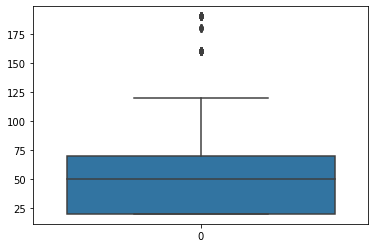

In [87]:
sns.boxplot(data=df_train2['MSSubClass'])

<AxesSubplot:>

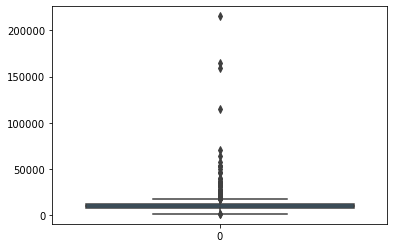

In [88]:
sns.boxplot(data=df_train2['LotArea'])

<AxesSubplot:>

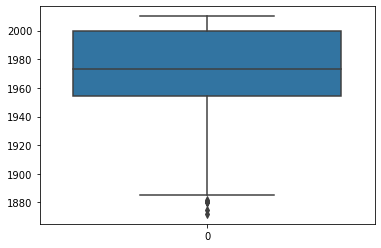

In [89]:
sns.boxplot(data=df_train2['YearBuilt'])

<AxesSubplot:>

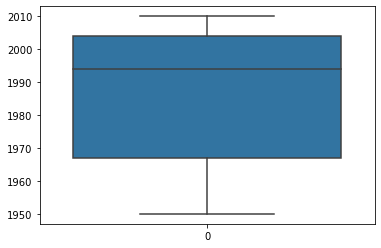

In [90]:
sns.boxplot(data=df_train2['YearRemodAdd'])

<AxesSubplot:>

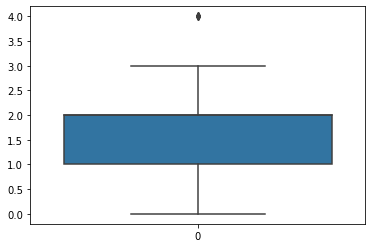

In [91]:
sns.boxplot(data=df_train2['GarageCars'])

In [92]:
#LotArea
quantile_25 = np.quantile(df_train2['LotArea'], 0.25)
quantile_75 = np.quantile(df_train2['LotArea'],0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
train_IQR = df_train2[(minimum <= df_train2['LotArea']) & (df_train2['LotArea'] <= maximum)]

In [93]:
print(train_IQR.shape)
print(df_train2.shape[0]-train_IQR.shape[0])

(1391, 12)
69


In [94]:
#
quantile_25 = np.quantile(train_IQR['MSSubClass'], 0.25)
quantile_75 = np.quantile(train_IQR['MSSubClass'],0.75)
IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
train_IQR = train_IQR[(minimum <= train_IQR['MSSubClass']) & (train_IQR['MSSubClass'] <= maximum)]

In [95]:
print(train_IQR.shape)
print(df_train2.shape[0]-train_IQR.shape[0])

(1293, 12)
167


<AxesSubplot:>

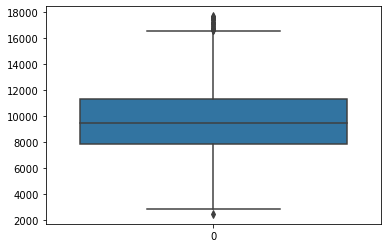

In [96]:
sns.boxplot(data=train_IQR['LotArea'])

### 01-5 상관관계 파악
1. pairplot을 확인해보면 RL이 제일많다.

In [97]:
# 건물클래스, 일반구역분류, 부지크기, 차고의 크기 상관관계 비교
pair_data = train_IQR[['MSSubClass','MSZoning','LotArea','GarageCars']]
pair_data

,MSSubClass,MSZoning,LotArea,GarageCars
0,60,RL,8450,2
1,20,RL,9600,2
2,60,RL,11250,2
3,70,RL,9550,3
4,60,RL,14260,3
...,...,...,...,...
1455,60,RL,7917,2
1456,20,RL,13175,2
1457,70,RL,9042,1
1458,20,RL,9717,1


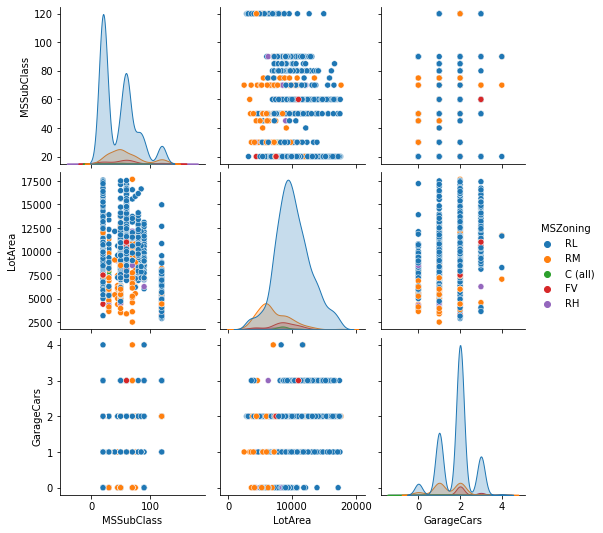

In [98]:
sns.pairplot(pair_data, hue='MSZoning')

<AxesSubplot:title={'center':'Person Correlation of Features'}>

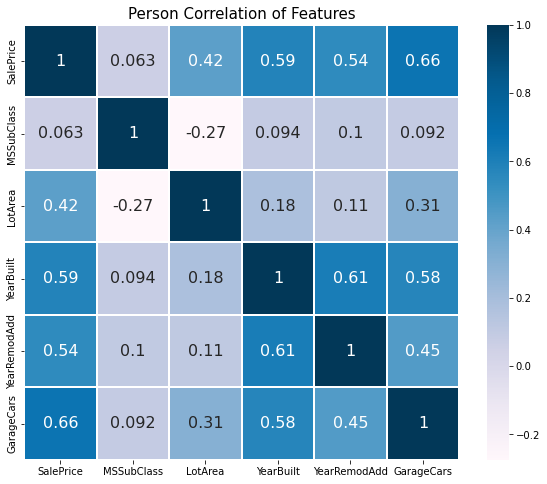

In [99]:
# heatmap : 변수별 상관관계 확인
colormap = plt.cm.PuBu
data = train_IQR.corr()
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y=1.0, size = 15)
sns.heatmap(data, linewidths=0.1, vmax=1.0, square =True, cmap= colormap, linecolor="white", annot=True, annot_kws={"size":16})

In [100]:
train_IQR.head()

,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Heating,GarageCars
0,208500,60,RL,8450,Pave,Reg,1Fam,2Story,2003,2003,GasA,2
1,181500,20,RL,9600,Pave,Reg,1Fam,1Story,1976,1976,GasA,2
2,223500,60,RL,11250,Pave,IR1,1Fam,2Story,2001,2002,GasA,2
3,140000,70,RL,9550,Pave,IR1,1Fam,2Story,1915,1970,GasA,3
4,250000,60,RL,14260,Pave,IR1,1Fam,2Story,2000,2000,GasA,3


### 01-6 원핫인코딩전 object변수들 삭제
1. feature 수가 많아지는것을 방지하기위해 중요도가 낮아보이는 column을 삭제한다.

In [101]:
df = train_IQR.drop(['Street','LotShape','BldgType','HouseStyle','Heating'],axis=1)

In [102]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotArea,YearBuilt,YearRemodAdd,GarageCars
0,208500,60,RL,8450,2003,2003,2
1,181500,20,RL,9600,1976,1976,2
2,223500,60,RL,11250,2001,2002,2
3,140000,70,RL,9550,1915,1970,3
4,250000,60,RL,14260,2000,2000,3


In [103]:
df_te=df_test2.drop(['Street','LotShape','BldgType','HouseStyle','Heating'],axis=1)

In [104]:
df_te.head()

,MSSubClass,MSZoning,LotArea,YearBuilt,YearRemodAdd,GarageCars
0,20,RH,11622,1961,1961,1.0
1,20,RL,14267,1958,1958,1.0
2,60,RL,13830,1997,1998,2.0
3,60,RL,9978,1998,1998,2.0
4,120,RL,5005,1992,1992,2.0


### 01-7 원핫인코딩

In [105]:
# 범주형 변수를 제거하기 위해 onehot encoding을 한다.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df[['MSZoning']])
onehot = encoder.transform(df[['MSZoning']])

onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
onehot = pd.concat([df, onehot], axis=1)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
onehot.head()

,SalePrice,MSSubClass,MSZoning,LotArea,YearBuilt,YearRemodAdd,GarageCars,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM
0,208500.0,60.0,RL,8450.0,2003.0,2003.0,2.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,20.0,RL,9600.0,1976.0,1976.0,2.0,0.0,0.0,0.0,1.0,0.0
2,223500.0,60.0,RL,11250.0,2001.0,2002.0,2.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,70.0,RL,9550.0,1915.0,1970.0,3.0,0.0,0.0,0.0,1.0,0.0
4,250000.0,60.0,RL,14260.0,2000.0,2000.0,3.0,0.0,0.0,0.0,1.0,0.0


In [107]:
df = onehot.drop(columns=['MSZoning'])

In [108]:
df.head()

,SalePrice,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM
0,208500.0,60.0,8450.0,2003.0,2003.0,2.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,20.0,9600.0,1976.0,1976.0,2.0,0.0,0.0,0.0,1.0,0.0
2,223500.0,60.0,11250.0,2001.0,2002.0,2.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,70.0,9550.0,1915.0,1970.0,3.0,0.0,0.0,0.0,1.0,0.0
4,250000.0,60.0,14260.0,2000.0,2000.0,3.0,0.0,0.0,0.0,1.0,0.0


In [109]:
encoder2 = OneHotEncoder()
encoder2.fit(df_te[['MSZoning']])
onehot2 = encoder2.transform(df_te[['MSZoning']])

onehot2 = onehot2.toarray()
onehot2 = pd.DataFrame(onehot2)
onehot2.columns = encoder2.get_feature_names()
onehot2 = pd.concat([df_te, onehot2], axis=1)


C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
onehot2.head()

,MSSubClass,MSZoning,LotArea,YearBuilt,YearRemodAdd,GarageCars,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x0_nan
0,20,RH,11622,1961,1961,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,RL,14267,1958,1958,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60,RL,13830,1997,1998,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60,RL,9978,1998,1998,2.0,0.0,0.0,0.0,1.0,0.0,0.0
4,120,RL,5005,1992,1992,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
df_te=onehot2.drop(columns=['MSZoning'])

In [112]:
df_te.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x0_nan
0,20,11622,1961,1961,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,14267,1958,1958,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60,13830,1997,1998,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60,9978,1998,1998,2.0,0.0,0.0,0.0,1.0,0.0,0.0
4,120,5005,1992,1992,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [113]:
df.isnull().sum()

SalePrice       148
MSSubClass      148
LotArea         148
YearBuilt       148
YearRemodAdd    148
GarageCars      148
x0_C (all)      148
x0_FV           148
x0_RH           148
x0_RL           148
x0_RM           148
dtype: int64

In [114]:
df=df.dropna()

In [115]:
df.isnull().sum()

SalePrice       0
MSSubClass      0
LotArea         0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
x0_C (all)      0
x0_FV           0
x0_RH           0
x0_RL           0
x0_RM           0
dtype: int64

In [116]:
df_te= df_te.fillna(0)

In [117]:
df_te.isnull().sum()

MSSubClass      0
LotArea         0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
x0_C (all)      0
x0_FV           0
x0_RH           0
x0_RL           0
x0_RM           0
x0_nan          0
dtype: int64

### 01-8 VIF

In [118]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif['VIF Facotr']=[variance_inflation_factor(df, i) for i in range(df.shape[1])]
vif['features']=df.columns
vif

,VIF Facotr,features
0,2.443920,SalePrice
1,1.130057,MSSubClass
2,1.399445,LotArea
3,2.043751,YearBuilt
4,1.799375,YearRemodAdd
5,1.991621,GarageCars
6,107.990818,x0_C (all)
7,513.735672,x0_FV
8,163.435661,x0_RH
9,12594.423762,x0_RL


In [119]:
new_df=df.drop(['x0_C (all)','x0_FV','x0_RH','x0_RL','x0_RM'],axis=1)

In [120]:
test_df=df_te.drop(['x0_C (all)','x0_FV','x0_RH','x0_RL','x0_RM'],axis=1)

In [121]:
new_df.head()

,SalePrice,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars
0,208500.0,60.0,8450.0,2003.0,2003.0,2.0
1,181500.0,20.0,9600.0,1976.0,1976.0,2.0
2,223500.0,60.0,11250.0,2001.0,2002.0,2.0
3,140000.0,70.0,9550.0,1915.0,1970.0,3.0
4,250000.0,60.0,14260.0,2000.0,2000.0,3.0


In [122]:
test_df.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars,x0_nan
0,20,11622,1961,1961,1.0,0.0
1,20,14267,1958,1958,1.0,0.0
2,60,13830,1997,1998,2.0,0.0
3,60,9978,1998,1998,2.0,0.0
4,120,5005,1992,1992,2.0,0.0


In [123]:
test_df=test_df.drop(columns=['x0_nan'])

In [124]:
test_df.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,GarageCars
0,20,11622,1961,1961,1.0
1,20,14267,1958,1958,1.0
2,60,13830,1997,1998,2.0
3,60,9978,1998,1998,2.0
4,120,5005,1992,1992,2.0


## 02. 모델링

### 02-1 랜덤포레스트 회귀 사용

In [125]:
X_train = new_df.drop(columns=['SalePrice'])
Y_train = new_df['SalePrice']

In [126]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(criterion='mse')

In [127]:
model.fit(X_train, Y_train)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

## 03. 튜닝

### 03-1 랜덤포레스트 변수중요도 확인

In [128]:
model.feature_importances_

array([0.04185691, 0.22580045, 0.30432824, 0.08882535, 0.33918905])

### 03-2 중요도 낮은 변수제거

In [129]:
#YearRemodAdd제거
X_train = X_train.drop(columns=['YearRemodAdd'])
test_1 = test_df.drop(columns=['YearRemodAdd'])

In [130]:
model_var1 = RandomForestRegressor(criterion = 'mse')
model_var1.fit(X_train, Y_train)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [131]:
y_pred = model_var1.predict(test_1)

In [69]:
print(y_pred)

[141844.5  149740.   196199.   ... 169275.84 127195.   291211.28]


In [132]:
submission_1 = pd.read_csv('sample_submission.csv')
submission_1['SalePrice'] = y_pred
submission_1.to_csv('sub_1.csv', index = False)